## MNIST NUMERI

## Import delle Librerie

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.layers import Input, Dense, Dropout, Conv2D, MaxPooling2D, Flatten
from keras.models import Sequential
from keras.models import Model
from keras.datasets import mnist
from keras.layers.advanced_activations import LeakyReLU, PReLU
from keras import callbacks
import numpy as np
from keras.utils import to_categorical
from sklearn.metrics import classification_report

%matplotlib inline

In [0]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [121]:
x_train.shape

(60000, 28, 28)

In [122]:
x_test.shape

(10000, 28, 28)

### Visualizzazione delle immagini del dataset

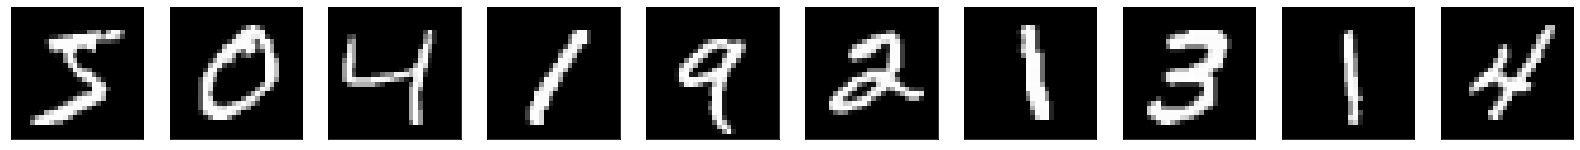

In [123]:
n = 10
plt.figure(figsize=(28, 28))
for i in range(n):
    # original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_train[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

### Normalizzazione dei valori del pixel

In [0]:
x_train = x_train/255
x_test = x_test/255

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [125]:
x_train.shape

(60000, 28, 28)

Reshape del dataset

In [0]:
x_train = np.reshape(x_train, (-1, 28, 28, 1))
x_test = np.reshape(x_test, (-1, 28, 28, 1))

In [127]:
x_train.shape

(60000, 28, 28, 1)

Definisco le misure

In [0]:
from keras import backend as K
def recall_m(y_true, y_pred):
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
        recall = true_positives / (possible_positives + K.epsilon())
        return recall

def precision_m(y_true, y_pred):
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
        precision = true_positives / (predicted_positives + K.epsilon())
        return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

# Implementazione della CNN

Definisco innanzitutto la funzione di callback che monitora il valore di val_loss per implementare early stopping

In [0]:
stop = callbacks.EarlyStopping(monitor="val_loss", min_delta=0, patience = 7)
stop2 = callbacks.EarlyStopping(monitor="val_acc", min_delta=0, patience = 7)


## Architettura della rete neurale

In [0]:
model3 = Sequential()
model3.add(Conv2D(16, (5, 5), activation = "relu", input_shape=(28,28,1), padding="same"))
model3.add(MaxPooling2D(pool_size=(2, 2))) 
model3.add(Conv2D(16, (4, 4), activation = "relu"))
model3.add(MaxPooling2D(pool_size=(3, 3)))
model3.add(Flatten())
model3.add(Dropout(0.2))
model3.add(Dense(16, activation="relu"))
model3.add(Dropout(0.2))
model3.add(Dense(10, activation="softmax"))

## Summary per evidenziare il numero di componenti e i parametri ad esse associati

In [131]:
model3.summary()
model3.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy', f1_m])

Model: "sequential_47"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_104 (Conv2D)          (None, 28, 28, 16)        416       
_________________________________________________________________
max_pooling2d_88 (MaxPooling (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_105 (Conv2D)          (None, 11, 11, 16)        4112      
_________________________________________________________________
max_pooling2d_89 (MaxPooling (None, 3, 3, 16)          0         
_________________________________________________________________
flatten_46 (Flatten)         (None, 144)               0         
_________________________________________________________________
dropout_91 (Dropout)         (None, 144)               0         
_________________________________________________________________
dense_91 (Dense)             (None, 16)              

In [132]:
history = model3.fit(x_train, y_train, epochs=50, validation_split = 0.25, batch_size=64, callbacks = [stop, stop2] , verbose=True)

Train on 45000 samples, validate on 15000 samples
Epoch 1/50
45000/45000 [==============================] - 8s 188us/step - loss: 0.7669 - acc: 0.7428 - f1_m: 0.7006 - val_loss: 0.1525 - val_acc: 0.9563 - val_f1_m: 0.9563
Epoch 2/50
45000/45000 [==============================] - 7s 147us/step - loss: 0.3224 - acc: 0.8962 - f1_m: 0.8965 - val_loss: 0.1080 - val_acc: 0.9651 - val_f1_m: 0.9660
Epoch 3/50
45000/45000 [==============================] - 7s 146us/step - loss: 0.2604 - acc: 0.9174 - f1_m: 0.9183 - val_loss: 0.0891 - val_acc: 0.9719 - val_f1_m: 0.9729
Epoch 4/50
45000/45000 [==============================] - 7s 149us/step - loss: 0.2259 - acc: 0.9299 - f1_m: 0.9306 - val_loss: 0.0842 - val_acc: 0.9751 - val_f1_m: 0.9757
Epoch 5/50
45000/45000 [==============================] - 7s 149us/step - loss: 0.2050 - acc: 0.9360 - f1_m: 0.9378 - val_loss: 0.0762 - val_acc: 0.9757 - val_f1_m: 0.9767
Epoch 6/50
45000/45000 [==============================] - 7s 148us/step - loss: 0.1821 - a

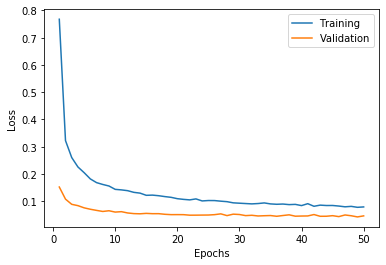

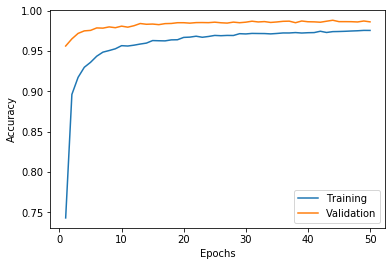

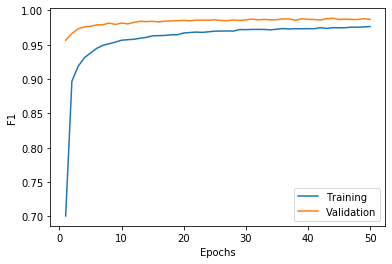

In [133]:
x_plot = list(range(1,history.epoch[-1]+2))

def plot_history(network_history):
    plt.figure()
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.plot(x_plot, network_history.history['loss'])
    plt.plot(x_plot, network_history.history['val_loss'])
    plt.legend(['Training', 'Validation'])
    
    plt.figure()
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.plot(x_plot, network_history.history['acc'])
    plt.plot(x_plot, network_history.history['val_acc'])
    plt.legend(['Training', 'Validation'])

    plt.figure()
    plt.xlabel('Epochs')
    plt.ylabel('F1')
    plt.plot(x_plot, network_history.history['f1_m'])
    plt.plot(x_plot, network_history.history['val_f1_m'])
    plt.legend(['Training', 'Validation'], loc='lower right')
    plt.show()
    
plot_history(history)

In [0]:
previsioni = model3.predict(x_test)
previsioni = previsioni.argmax(axis = 1)
previsioni = to_categorical(previsioni)

In [135]:
report = classification_report(previsioni, y_test)
print(report)
trainloss, trainacc, trainf1 = model3.evaluate(x_train, y_train)
print("Train Loss: " + str(trainloss))
print("Train Accuracy: " + str(trainacc))
print("Train F1: " + str(trainf1))
testloss, testacc, testf1 = model3.evaluate(x_test, y_test)
print("Test Loss: " + str(testloss))
print("Test Accuracy: " + str(testacc))
print("Test F1: " + str(testf1))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       985
           1       0.99      0.99      0.99      1129
           2       0.99      0.98      0.99      1042
           3       1.00      0.99      0.99      1019
           4       0.98      0.99      0.99       971
           5       0.98      0.98      0.98       893
           6       0.99      0.99      0.99       957
           7       0.99      0.99      0.99      1029
           8       0.98      0.99      0.99       966
           9       0.98      0.98      0.98      1009

   micro avg       0.99      0.99      0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000
 samples avg       0.99      0.99      0.99     10000

60000/60000 [==============================] - 6s 97us/step
Train Loss: 0.0261484071215149
Train Accuracy: 0.99225
Train F1: 0.9922785230636597
10000/10000 [==============================